In [43]:
%matplotlib inline
import pandas_profiling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
df = pd.read_spss('project3改-集群分析資料.sav')
df["QCL_1"] = df["QCL_1"].astype("int")
df

,a1,a2,a3,a4,a5,a6,a7,a8,q1,q2,...,FAC5,FAC6,FAC7,FAC8,FAC9,FAC10,FAC11,FAC12,FAC13,QCL_1
0,男,北部,尚未工作,"NT$ 150,000 - 199,999",4.0,新聞,3C、科技,球類、游泳、韻律、健身房等活動,同意,有一點不同意,...,0.070177,0.289753,0.184707,0.558053,-1.321927,1.606639,0.141024,0.272209,-0.786470,5
1,男,北部,尚未工作,"NT$ 200,000及以上",6.0,綜藝節目,3C、科技,上網咖、網際網路或BBS站,有一點同意,同意,...,-0.985151,-0.326985,1.136460,1.442899,1.200609,-0.094909,-1.436634,-0.113045,1.743963,2
2,男,北部,尚未工作,"NT$ 100,000 - 149,999",4.0,綜藝節目,休閒、旅遊,看電視、電影、MTV或唱KTV,有一點同意,同意,...,0.889189,0.199897,0.244788,-0.921362,-0.070024,-0.095636,-0.792641,1.017360,-0.682559,1
3,男,北部,尚未工作,"NT$ 99,999及以下",2.0,新聞,影視娛樂,閱讀報章、雜誌、小說及漫畫,有一點同意,有一點同意,...,-0.831536,0.346205,-0.506742,-0.464816,-0.773009,0.631529,-0.261633,-0.124102,-0.563196,3
4,男,北部,尚未工作,"NT$ 200,000及以上",2.0,體育,影視娛樂,球類、游泳、韻律、健身房等活動,同意,同意,...,0.880978,0.392306,0.275587,0.591628,-1.566337,1.204995,-0.270782,0.442900,-1.055709,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,女,南部,個人自由業 (SOHO族、家教、補教老師….),不知道,2.0,日韓戲劇,新聞、社會評論,看電視、電影、MTV或唱KTV,有一點不同意,同意,...,1.961135,-1.568589,1.672441,-0.304585,2.025184,-1.720910,1.526108,-0.195419,0.729224,1
454,女,南部,個人自由業 (SOHO族、家教、補教老師….),"NT$ 100,000 - 149,999",2.0,知識、教育,流行、時尚,逛街或購物,同意,有一點同意,...,1.665637,-0.702683,0.198756,1.521267,0.446416,-1.190234,1.117925,0.409073,0.510509,1
455,女,南部,個人自由業 (SOHO族、家教、補教老師….),"NT$ 100,000 - 149,999",1.0,綜藝節目,流行、時尚,看電視、電影、MTV或唱KTV,有一點同意,有一點同意,...,0.256224,0.766453,-0.514771,0.348277,0.051459,1.082833,-0.321590,0.839859,0.526624,1
456,女,南部,學校方面行業,"NT$ 150,000 - 199,999",2.5,日韓戲劇,流行、時尚,逛街或購物,有一點同意,有一點不同意,...,0.496211,0.670454,0.131345,1.585086,-0.858768,-0.074743,0.286286,-1.069360,0.071286,5


In [84]:
picture = df.iloc[:,0:8]
picture["QCL_1"]= df["QCL_1"]


picture["Count"] = 1
gender = picture.groupby(["a1"]).count()["Count"]
location = picture.groupby(["a2"]).count()["Count"]

In [85]:
print(gender)
print(location)

a1
女    229
男    229
Name: Count, dtype: int64
a2
中部    153
北部    160
南部    145
Name: Count, dtype: int64


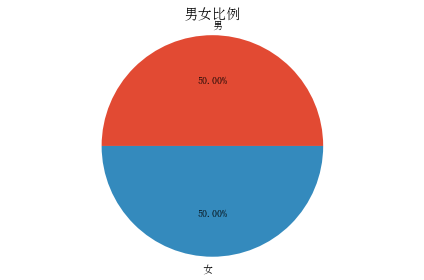

In [96]:
# plt.figure(figsize=(9, 6)) 
# plt.style.use('ggplot')
labels = ["男","女"]
plt.pie(gender, labels=labels, autopct = "%2.2f%%")
plt.title("男女比例")
plt.axis('equal')
plt.tight_layout()
# plt.savefig('因素平均值.png')
plt.show()

In [113]:
picture.groupby(["a1"]).count()["Count"]

a1
女    229
男    229
Name: Count, dtype: int64

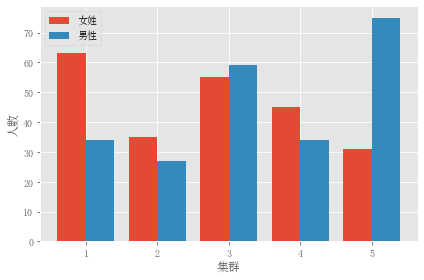

In [136]:
picture.groupby(["QCL_1","a1"]).count()["Count"]

x1=[1,2,3,4,5]
girls=[63,35,55,45,31]
boys = [34,27,59,34,75]

# 比起堆疊長條圖，分組長條圖稍微調整數據以達到效果
width = 0.4 #先設定每個長條的寬度
plt.bar([i-width/2 for i in x1], girls, width=width, label='女姓') #注意這裡的X軸座標為x1中的數據減去寬度的一半
plt.bar([i+width/2 for i in x1], boys, width=width, label='男性') #注意這裡的X軸座標為x1中的數據加上寬度的一半
plt.xlabel("集群")
plt.ylabel("人數")
plt.tight_layout()
plt.legend()
plt.show()

In [137]:
picture.groupby(["QCL_1","a2"]).count()["Count"]

QCL_1  a2
1      中部    30
       北部    24
       南部    43
2      中部    15
       北部    21
       南部    26
3      中部    49
       北部    44
       南部    21
4      中部    31
       北部    30
       南部    18
5      中部    28
       北部    41
       南部    37
Name: Count, dtype: int64

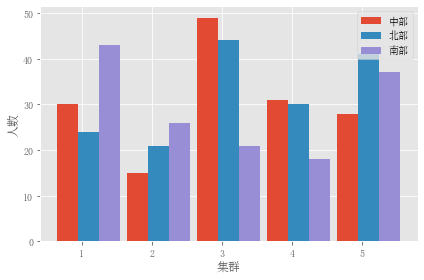

In [144]:
picture.groupby(["QCL_1","a2"]).count()["Count"]

x1 = [1,2,3,4,5]
y1 = [30,15,49,31,28]
y2 = [24,21,44,30,41]
y3 = [43,26,21,18,37]

# 比起堆疊長條圖，分組長條圖稍微調整數據以達到效果
width = 0.3 #先設定每個長條的寬度
plt.bar([i-2*width/3 for i in x1], y1, width=width, label='中部') #注意這裡的X軸座標為x1中的數據減去寬度的一半
plt.bar([i+width/3 for i in x1], y2, width=width, label='北部') #注意這裡的X軸座標為x1中的數據加上寬度的一半
plt.bar([i+4*width/3 for i in x1], y3, width=width, label='南部') #注意這裡的X軸座標為x1中的數據加上寬度的一半
plt.xlabel("集群")
plt.ylabel("人數")
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
labels = index.picture.groupby(["a1"]
plt.pie(gender, labels=), autopct = "%2.2f%%")
plt.title("男女比例")
plt.axis('equal')
plt.tight_layout()
# plt.savefig('因素平均值.png')
plt.show()